In [1]:
# import rozneho potrebneho...

%load_ext autoreload
%autoreload

%matplotlib nbagg

import numpy as np
from scipy.integrate import odeint

import sys
sys.path.append('./misc/')

from figFcns_nb import *

# Ukážka simulačnej schémy pre simuláciu daného riadeného systému

Cieľom nasledujúceho je zostaviť (univerzálnu) simulačnú schému, do ktorej je možné následne doplniť v podstate akýkoľvek riadiaci systém.


Simulačná schéma v tomto prípade realizuje len simuláciu samotného riadeného systému. Vstupný signál riadeného systému je tu zvolený (daný vopred), nie je generovaný riadiacim systémom.


Riadený systém nech predstavuje prenosová funkcia v tvare
\begin{equation} \label{riadenySys}
	G(s) = \frac{0,15}{s^2 + 0,3s + 0,2}
\end{equation}
Ide o prenosovú funkciu druhého rádu, ktorá má v čitateli polynóm nultého stupňa, teda nemá nuly.  

Funkcia, ktorá realizuje diferenciálne rovnice riadeného systému, je definovaná v samostatnom súbore (module), a imporotovaná tu:

In [2]:
import plantFcns

Simulačnú schému nech realizuje nasledujúca funkcia:

In [3]:
def fcn_simSch_01_zaklad(t_start, T_s, finalIndex, sig_u_ext):

    #-----------------------------------------
    t_log = np.zeros([finalIndex, 1])
    t_log[0,:] = t_start

    #-----------------------------------------
    x_0 = np.array([0, 0])

    x_log = np.zeros([finalIndex, len(x_0)])
    x_log[0,:] = x_0

    #-----------------------------------------


    #-----------------------------------------
    timespan = np.zeros(2)
    for idx in range(1, int(finalIndex)):

        timespan[0] = t_log[idx-1,:]
        timespan[1] = t_log[idx-1,:] + T_s

        u = sig_u_ext[idx-1,:]

        odeOut = odeint(plantFcns.fcn_difRovnice,
                        x_log[idx-1,:],
                        timespan,
                        args=(u,)
                        )

        x_log[idx,:] = odeOut[-1,:]
        t_log[idx,:] = timespan[-1]

    return [t_log, x_log]

Nastavenia potrebné pre samotnú simuláciu a vygenerovanie signálov, ktoré sa používajú pri simulácii (ktoré sú dopredu známe - dané):

In [4]:
# Nastavenia simulacie

sim_t_start = 0
sim_t_final = 200
sim_T_s = 0.1
sim_finalIndex = int(((sim_t_final - sim_t_start)/sim_T_s) + 1)

Pre simuláciu je potrebné vytvoriť vstupný signál $u(t)$ pre riadený systém. Nech je nasledovný:

In [5]:
tab_delt_u = np.array([
                      [0, 0],
                      [1, 1],
                      [50, 0],
                      [100, -1],
                      [150, 0],
                      ])


sig_delt_u = np.zeros([sim_finalIndex, 1])
for idx in range(sig_delt_u.shape[0]):
    lastValue = tab_delt_u[:,1][tab_delt_u[:,0]<=idx*sim_T_s ][-1]
    sig_delt_u[idx] = lastValue

    
sig_u_ext = sig_delt_u

Spustenie simulácie:

In [6]:
# Spustenie simulacie

t_log, x_log = fcn_simSch_01_zaklad(
                    sim_t_start,
                    sim_T_s,
                    sim_finalIndex,
                    sig_u_ext,
                    )

Nakreslenie obrázku (pre prehľadnosť tohto notebooku je kód v samostatnom súbore):

<IPython.core.display.Javascript object>


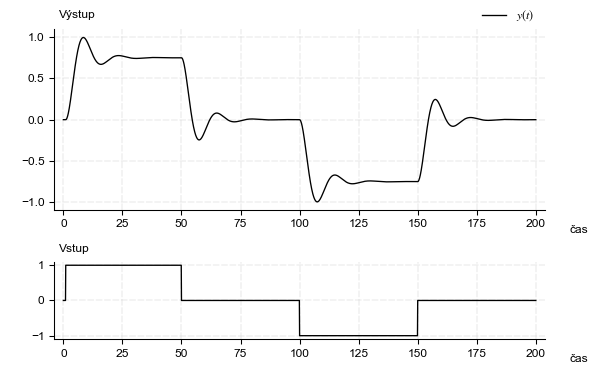

In [7]:
execfile('misc/v_fig_lenSystem.py')